In [18]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt

import os
import random
import numpy as np
from PIL import Image
import sys
sys.path.append("/home/prasad/utils/")
from pre_processing import get_seq_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
inp, target = get_seq_data("./INSAT3D_TIR1_India/")

In [20]:
for elems in zip(inp,target):
    print(elems[0],elems[1])

['./INSAT3D_TIR1_India/3DIMG_07NOV2019_0000_L1C_SGP.tif', './INSAT3D_TIR1_India/3DIMG_07NOV2019_0030_L1C_SGP.tif', './INSAT3D_TIR1_India/3DIMG_07NOV2019_0100_L1C_SGP.tif'] ['./INSAT3D_TIR1_India/3DIMG_07NOV2019_0130_L1C_SGP.tif']
['./INSAT3D_TIR1_India/3DIMG_07NOV2019_0030_L1C_SGP.tif', './INSAT3D_TIR1_India/3DIMG_07NOV2019_0100_L1C_SGP.tif', './INSAT3D_TIR1_India/3DIMG_07NOV2019_0130_L1C_SGP.tif'] ['./INSAT3D_TIR1_India/3DIMG_07NOV2019_0200_L1C_SGP.tif']
['./INSAT3D_TIR1_India/3DIMG_07NOV2019_0100_L1C_SGP.tif', './INSAT3D_TIR1_India/3DIMG_07NOV2019_0130_L1C_SGP.tif', './INSAT3D_TIR1_India/3DIMG_07NOV2019_0200_L1C_SGP.tif'] ['./INSAT3D_TIR1_India/3DIMG_07NOV2019_0230_L1C_SGP.tif']
['./INSAT3D_TIR1_India/3DIMG_07NOV2019_0130_L1C_SGP.tif', './INSAT3D_TIR1_India/3DIMG_07NOV2019_0200_L1C_SGP.tif', './INSAT3D_TIR1_India/3DIMG_07NOV2019_0230_L1C_SGP.tif'] ['./INSAT3D_TIR1_India/3DIMG_07NOV2019_0300_L1C_SGP.tif']
['./INSAT3D_TIR1_India/3DIMG_07NOV2019_0200_L1C_SGP.tif', './INSAT3D_TIR1_India/

In [2]:
files = os.listdir("./INSAT3D_TIR1_India/")
files.sort()
print(files)
tir_to_num = {}
for num,file in enumerate(files):
    tir_to_num[file] = num + 1

['3DIMG_07NOV2019_0000_L1C_SGP.tif', '3DIMG_07NOV2019_0030_L1C_SGP.tif', '3DIMG_07NOV2019_0100_L1C_SGP.tif', '3DIMG_07NOV2019_0130_L1C_SGP.tif', '3DIMG_07NOV2019_0200_L1C_SGP.tif', '3DIMG_07NOV2019_0230_L1C_SGP.tif', '3DIMG_07NOV2019_0300_L1C_SGP.tif', '3DIMG_07NOV2019_0330_L1C_SGP.tif', '3DIMG_07NOV2019_0400_L1C_SGP.tif', '3DIMG_07NOV2019_0430_L1C_SGP.tif', '3DIMG_07NOV2019_0500_L1C_SGP.tif', '3DIMG_07NOV2019_0530_L1C_SGP.tif', '3DIMG_07NOV2019_0600_L1C_SGP.tif', '3DIMG_07NOV2019_0630_L1C_SGP.tif', '3DIMG_07NOV2019_0700_L1C_SGP.tif', '3DIMG_07NOV2019_0730_L1C_SGP.tif', '3DIMG_07NOV2019_0800_L1C_SGP.tif', '3DIMG_07NOV2019_0830_L1C_SGP.tif', '3DIMG_07NOV2019_0859_L1C_SGP.tif', '3DIMG_07NOV2019_0900_L1C_SGP.tif', '3DIMG_07NOV2019_0929_L1C_SGP.tif', '3DIMG_07NOV2019_0930_L1C_SGP.tif', '3DIMG_07NOV2019_0959_L1C_SGP.tif', '3DIMG_07NOV2019_1000_L1C_SGP.tif', '3DIMG_07NOV2019_1030_L1C_SGP.tif', '3DIMG_07NOV2019_1100_L1C_SGP.tif', '3DIMG_07NOV2019_1130_L1C_SGP.tif', '3DIMG_07NOV2019_1200_L1C_S

In [5]:
lst = files[:18]

In [10]:

from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, datasets, models

class SimDataset(Dataset):
    def __init__(self,file_list, name_to_num = None, transform=None, seq_frame=3, pred_frame=2):
        self.file_list = file_list
        self.transform = transform
        self.name_to_num = name_to_num
        self.seq_frame = seq_frame
        self.pred_frame = pred_frame
        
    def __len__(self):
        return  len(self.file_list) - (self.seq_frame + self.pred_frame)
    
    def __getitem__(self, idx):
        inp, target = [],[]
        for i in range(idx,idx+self.seq_frame):
            image = np.array(Image.open(f'./INSAT3D_TIR1_India/{self.file_list[i]}').resize(256,280))#[:,:1072]
            image = image.astype(np.float)
            inp.append(image)
        inp = np.array(inp)
        
        for i in range(idx+self.seq_frame,idx+self.pred_frame+self.seq_frame):
            image = np.array(Image.open(f'./INSAT3D_TIR1_India/{self.file_list[i]}').resizee(256,280))#[:,:1072]
            image = image.astype(np.float)
            target.append(image)
        target = np.array(target)
        
        if self.transform:
            image = self.transform(image)
            #target = self.transform(target)
        
        return [inp,target]

files = os.listdir("./INSAT3D_TIR1_India/")
files.sort()

train_list  = files[:12] 
test_list = files[12:17] 

# use same transform for train/val for this example
trans = transforms.Compose([
    transforms.ToTensor(),
])

dic = tir_to_num

train_set = SimDataset(train_list, dic, transform = trans)
val_set = SimDataset(test_list, dic, transform = trans)

image_datasets = {
    'train': train_set, 'val': val_set
}

batch_size = 1

dataloaders = {
    'train': DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=0),
    'val': DataLoader(val_set, batch_size=batch_size, shuffle=True, num_workers=0)
}

dataset_sizes = {
    x: len(image_datasets[x]) for x in image_datasets.keys()
}

dataset_sizes

ValueError: num_samples should be a positive integer value, but got num_samples=0

torch.Size([1, 3, 984, 1072]) torch.Size([1, 2, 984, 1072])
525.0 944.0 676.6248875035392 102.18206871758288
518.0 939.0 662.3058900429256 101.79768494542166


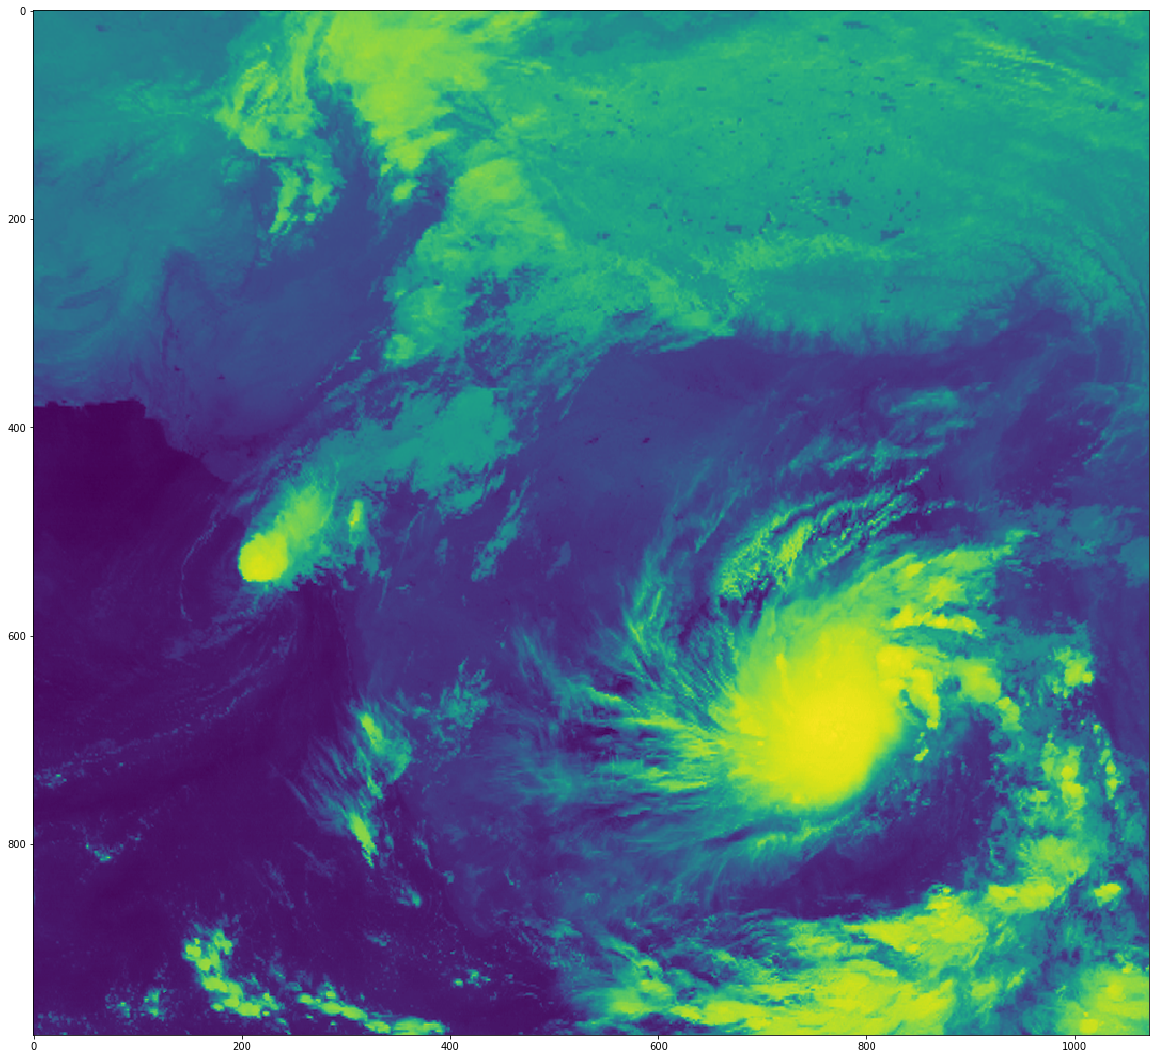

In [7]:
import torchvision.utils

def reverse_transform(inp):
    inp = inp.numpy().transpose((1, 2, 0))
    inp = np.clip(inp, 0, 1)
    inp = (inp * 255).astype(np.uint8)
    
    return inp

# Get a batch of training data
inputs, masks = next(iter(dataloaders['train']))

print(inputs.shape, masks.shape)
for x in [inputs.numpy(), masks.numpy()]:
    print(x.min(), x.max(), x.mean(), x.std())

plt.figure(figsize = (20,20))
plt.imshow(inputs[0,0])

In [32]:
dir_path = "./../SIH/INSAT_Cloud_Labels/mosdac.gov.in/Order/Jul20_062276/"
files = os.listdir(dir_path)
files.sort()
ind = 0
#ind = files.index('3DIMG_06NOV2019_0730_L1C_SGP_IMG_VIS.tif')
#files[ind]
files[ind]

'3DIMG_01NOV2019_0000_L1B_STD_IMG_TIR1.tif'

In [33]:
image = np.array(Image.open(dir_path + files[ind]))

In [34]:
image.shape

(2651, 2962)

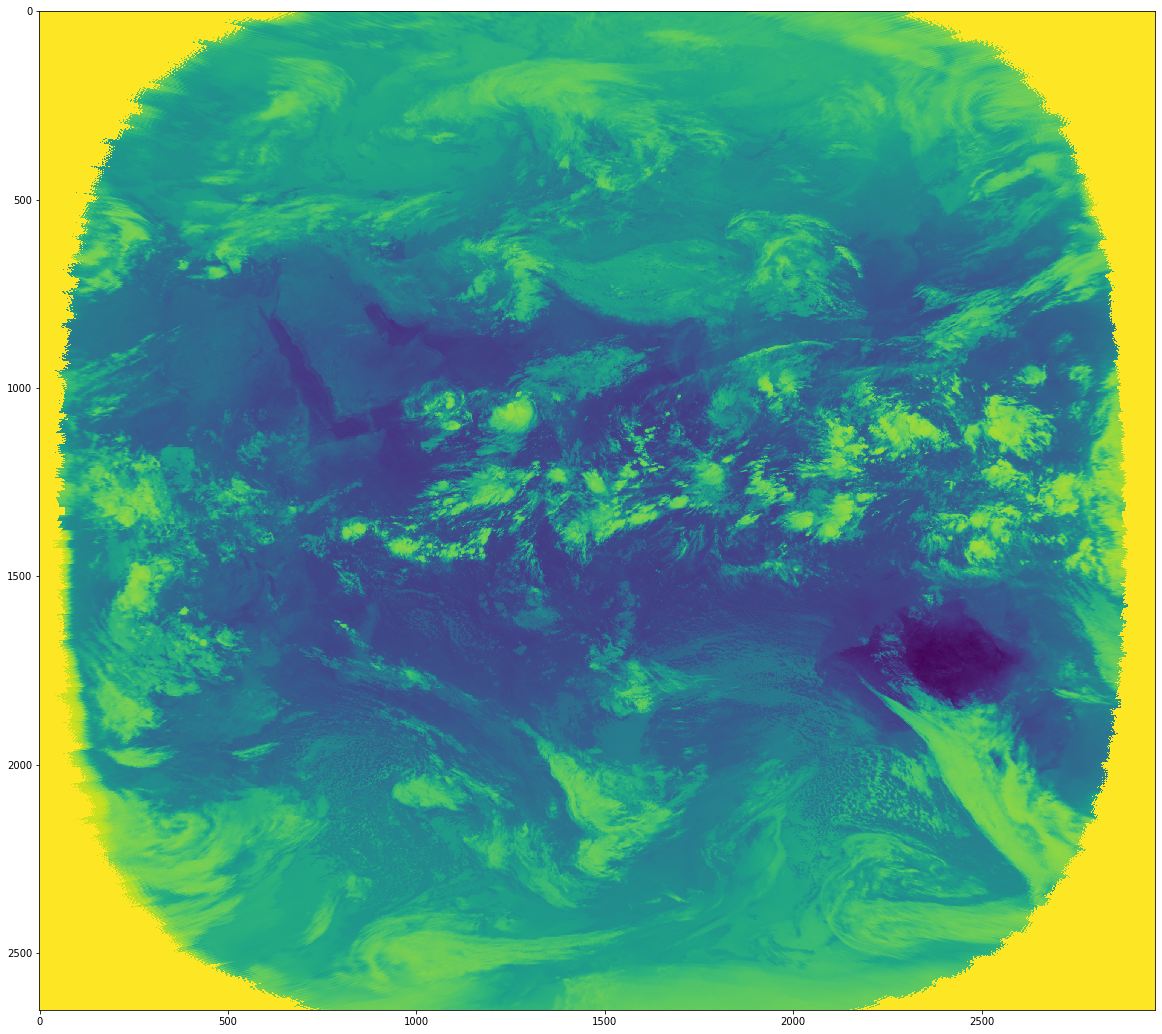

In [36]:
#files = os.listdir("./INSAT3D_TIR1_India/")
#files.sort()
#print(files[15])
image = np.array( Image.open(dir_path+files[ind]) )
plt.figure(figsize=(20,20))
plt.imshow(image)

In [8]:
from torchsummary import summary
import torch
import torch.nn as nn
import pytorch_unet

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = pytorch_unet.UNet(2)
model = model.to(device)

summary(model, input_size=(3, 256, 280))

RuntimeError: CUDA error: out of memory

In [10]:
from collections import defaultdict
import torch.nn.functional as F
from loss import dice_loss

def calc_loss(pred, target, metrics, bce_weight=0.5):
    """
    bce = F.binary_cross_entropy_with_logits(pred, target)
        
    pred = F.sigmoid(pred)
    dice = dice_loss(pred, target)
    
    loss = bce * bce_weight + dice * (1 - bce_weight)
    """
    mse = nn.MSELoss()
    loss = mse(pred,target)
    metrics['bce'] += 0 * target.size(0)
    metrics['dice'] += 0 * target.size(0)
    metrics['loss'] += loss.data.cpu().numpy() * target.size(0)
    
    return loss

def print_metrics(metrics, epoch_samples, phase):    
    outputs = []
    for k in metrics.keys():
        outputs.append("{}: {:4f}".format(k, metrics[k] / epoch_samples))
        
    print("{}: {}".format(phase, ", ".join(outputs)))    

def train_model(model, optimizer, scheduler, num_epochs=25):
    best_model_wts = copy.deepcopy(model.state_dict())
    best_loss = 1e10

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)
        
        since = time.time()

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                #scheduler.step()
                #for param_group in optimizer.param_groups:
                #    print("LR", param_group['lr'])
                    
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            metrics = defaultdict(float)
            epoch_samples = 0
            
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device, dtype=torch.float)
                labels = labels.to(device, dtype=torch.float)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    loss = calc_loss(outputs, labels, metrics)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                epoch_samples += inputs.size(0)
                
            if phase == 'train':
                scheduler.step()
                for param_group in optimizer.param_groups:
                    print("LR", param_group['lr'])
            

            print_metrics(metrics, epoch_samples, phase)
            epoch_loss = metrics['loss'] / epoch_samples

            # deep copy the model
            if phase == 'val' and epoch_loss < best_loss:
                print("saving best model")
                best_loss = epoch_loss
                best_model_wts = copy.deepcopy(model.state_dict())

        time_elapsed = time.time() - since
        print('{:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val loss: {:4f}'.format(best_loss))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model,optimizer,scheduler

In [11]:
import torch
import torch.optim as optim
from torch.optim import lr_scheduler
import time
import copy

import torch.nn as nn
import pytorch_unet

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

num_class = 1

#model = pytorch_unet.UNet(num_class).to(device)
#model = model.to(device)

# Observe that all parameters are being optimized
optimizer_ft = optim.Adam(model.parameters(), lr=5e-3)

exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=25, gamma=0.8)

model,optimizer_ft, exp_lr_scheduler = train_model(model, optimizer_ft, exp_lr_scheduler, num_epochs=50)


cuda:0
Epoch 0/49
----------
LR 0.005
train: bce: 0.000000, dice: 0.000000, loss: 5539509339171626.000000
val: bce: 0.000000, dice: 0.000000, loss: 103680.325000
saving best model
0m 11s
Epoch 1/49
----------
LR 0.005
train: bce: 0.000000, dice: 0.000000, loss: 270991.867656
val: bce: 0.000000, dice: 0.000000, loss: 79709.571094
saving best model
0m 11s
Epoch 2/49
----------
LR 0.005
train: bce: 0.000000, dice: 0.000000, loss: 60107.169375
val: bce: 0.000000, dice: 0.000000, loss: 13151.494922
saving best model
0m 11s
Epoch 3/49
----------
LR 0.005
train: bce: 0.000000, dice: 0.000000, loss: 5223.396211
val: bce: 0.000000, dice: 0.000000, loss: 2863.079688
saving best model
0m 11s
Epoch 4/49
----------
LR 0.005
train: bce: 0.000000, dice: 0.000000, loss: 2294.923120
val: bce: 0.000000, dice: 0.000000, loss: 2708.601965
saving best model
0m 11s
Epoch 5/49
----------
LR 0.005
train: bce: 0.000000, dice: 0.000000, loss: 2156.452515
val: bce: 0.000000, dice: 0.000000, loss: 2589.132275
sav